In [2]:
# Evaluation of experiments
import matplotlib.pyplot as plt
import pandas as pd

dfExperiments45 = pd.read_csv('experiments_similarityScore_45_negativeSamples_3_2019-01-07T14-35-41.424.csv', sep=',', low_memory=False, header=None)
dfExperiments45.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']
dfExperiments45['Indexing Threshold'] = '0.45'

dfExperiments70 = pd.read_csv('experiments_similarityScore_70_negativeSamples_3_2019-01-07T14-33-45.166.csv', sep=',', low_memory=False, header=None)
dfExperiments70.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']
dfExperiments70['Indexing Threshold'] = '0.7'

In [6]:
#Keep only baselines
dfExperiments45 = dfExperiments45[~dfExperiments45['Experiment'].str.contains('transfer_')]
dfExperiments70 = dfExperiments70[~dfExperiments70['Experiment'].str.contains('transfer_')]
#display(dfExperiments)

#Compare baselines to matching rule
def compareLearnedRuleWithBaseline(dfExperiments):

    dfBaselineExperimentsCompared = pd.DataFrame()

    for targetTable in dfExperiments['TargetTable'].unique():
        dfSubSetExperiments = dfExperiments[dfExperiments['TargetTable'] == targetTable]
        dfLearnedMatchingRule = dfSubSetExperiments[dfSubSetExperiments['Experiment'].str.contains('learned_')]
        dfBaselinesMatchingRule = dfSubSetExperiments[dfSubSetExperiments['Experiment'].str.contains('baseline_')]
    
        for indexLearned, rowLearned in dfLearnedMatchingRule.iterrows():
            dfBaselineExperimentsTmpCompared = pd.DataFrame()
            for indexBaseline, rowBaseline in dfBaselinesMatchingRule.iterrows():
                newRow = rowLearned.copy()
                newRow['Precision-Delta'] = rowLearned['Precision'] - rowBaseline['Precision']
                newRow['Recall-Delta'] = rowLearned['Recall'] - rowBaseline['Recall']
                newRow['F-1-Delta'] = rowLearned['F-1'] - rowBaseline['F-1']
                newRow['Experiment'] = rowBaseline['Experiment']
            
                dfBaselineExperimentsTmpCompared = dfBaselineExperimentsTmpCompared.append(newRow, ignore_index=True)
            
            dfBaselineExperimentsTmpCompared = dfBaselineExperimentsTmpCompared.sort_values(by=['F-1-Delta']).iloc[0]
            dfBaselineExperimentsCompared = dfBaselineExperimentsCompared.append(dfBaselineExperimentsTmpCompared)
    return dfBaselineExperimentsCompared

dfBaselineExperimentsCompared = compareLearnedRuleWithBaseline(dfExperiments45)
dfBaselineExperimentsCompared = dfBaselineExperimentsCompared.append(compareLearnedRuleWithBaseline(dfExperiments70))
dfBaselineExperimentsCompared = dfBaselineExperimentsCompared.sort_values(by=['TargetTable'])

dfBaselineExperimentsCompared = dfBaselineExperimentsCompared.filter(items=['TargetTable', 'Indexing Threshold',  'TrainedModel', 'Precision', 'Recall',  'F-1', 'Experiment','Precision-Delta',  'Recall-Delta','F-1-Delta'])
dfBaselineExperimentsCompared['Experiment'] = dfBaselineExperimentsCompared['Experiment'].str.replace('baseline_', '').str.replace('_hotel', '')
dfBaselineExperimentsCompared['Experiment'] = dfBaselineExperimentsCompared['Experiment'].str.split('-', expand=True)[0]
dfBaselineExperimentsCompared['TrainedModel'] = dfBaselineExperimentsCompared['TrainedModel'].str.replace('J48', 'DT')
dfBaselineExperimentsCompared['TrainedModel'] = dfBaselineExperimentsCompared['TrainedModel'].str.replace('SimpleLogistic', 'LR')
dfBaselineExperimentsCompared['TargetTable'] = dfBaselineExperimentsCompared['TargetTable'].str.replace('hotels_www.', '')
dfBaselineExperimentsCompared['TargetTable'] = dfBaselineExperimentsCompared['TargetTable'].str.replace('.com', '')
dfBaselineExperimentsCompared['TargetTable'] = dfBaselineExperimentsCompared['TargetTable'].str.replace('.csv', '')
dfBaselineExperimentsCompared['TargetTable'] = dfBaselineExperimentsCompared['TargetTable'].str.replace('ihg', 'IHG')
dfBaselineExperimentsCompared['TargetTable'] = dfBaselineExperimentsCompared['TargetTable'].str.replace('nighttours', 'NT')
dfBaselineExperimentsCompared['TargetTable'] = dfBaselineExperimentsCompared['TargetTable'].str.replace('touristlink', 'TL')

dfBaselineExperimentsCompared = dfBaselineExperimentsCompared.replace('all', 'All')
dfBaselineExperimentsCompared = dfBaselineExperimentsCompared.replace('bag_of_words', 'BoW')
dfBaselineExperimentsCompared = dfBaselineExperimentsCompared.replace('linear_combination', 'LC')
dfBaselineExperimentsCompared = dfBaselineExperimentsCompared.replace('label', 'Label')
dfBaselineExperimentsCompared = dfBaselineExperimentsCompared.round(3)
display(dfBaselineExperimentsCompared)

print(dfBaselineExperimentsCompared.to_latex(index=False))

,TargetTable,Indexing Threshold,TrainedModel,Precision,Recall,F-1,Experiment,Precision-Delta,Recall-Delta,F-1-Delta
0,All,0.45,DT,0.877,0.980,0.926,Label,-0.056,0.157,0.051
0,All,0.45,LR,0.860,0.961,0.907,Label,-0.074,0.137,0.032
0,All,0.7,DT,0.860,0.961,0.907,Label,-0.074,0.137,0.032
0,All,0.7,LR,0.877,0.980,0.926,Label,-0.056,0.157,0.051
0,IHG,0.45,DT,0.676,0.926,0.781,Label,-0.021,0.074,0.015
0,IHG,0.45,LR,0.694,0.926,0.794,Label,-0.003,0.074,0.027
0,IHG,0.7,DT,0.643,1.000,0.783,Label,-0.054,0.148,0.016
0,IHG,0.7,LR,0.667,0.963,0.788,Label,-0.030,0.111,0.021
0,NT,0.45,DT,0.952,1.000,0.976,Label,-0.048,0.200,0.087
0,NT,0.45,LR,0.952,1.000,0.976,Label,-0.048,0.200,0.087


\begin{tabular}{lllrrrlrrr}
\toprule
TargetTable & Indexing Threshold & TrainedModel &  Precision &  Recall &    F-1 & Experiment &  Precision-Delta &  Recall-Delta &  F-1-Delta \\
\midrule
        All &               0.45 &           DT &      0.877 &   0.980 &  0.926 &      Label &           -0.056 &         0.157 &      0.051 \\
        All &               0.45 &           LR &      0.860 &   0.961 &  0.907 &      Label &           -0.074 &         0.137 &      0.032 \\
        All &                0.7 &           DT &      0.860 &   0.961 &  0.907 &      Label &           -0.074 &         0.137 &      0.032 \\
        All &                0.7 &           LR &      0.877 &   0.980 &  0.926 &      Label &           -0.056 &         0.157 &      0.051 \\
        IHG &               0.45 &           DT &      0.676 &   0.926 &  0.781 &      Label &           -0.021 &         0.074 &      0.015 \\
        IHG &               0.45 &           LR &      0.694 &   0.926 &  0.794 &      Lab

In [15]:
import csv

dfExperimentsAll = dfBaselineExperimentsCompared[dfBaselineExperimentsCompared['TargetTable'].str.contains('All')]
dfExperimentsOther = dfBaselineExperimentsCompared[~dfBaselineExperimentsCompared['TargetTable'].str.contains('All')]

dfAggregatedExperiments = dfExperimentsOther.groupby(['Indexing Threshold']).mean()
dfAggregatedExperiments['Level'] = 'Other'
dfAggregatedExperimentsAll = dfExperimentsAll.groupby(['Indexing Threshold']).mean()
dfAggregatedExperimentsAll['Level'] = 'All'

dfAggregatedExperiments = dfAggregatedExperiments.append(dfAggregatedExperimentsAll)
display(dfAggregatedExperiments)
dfAggregatedExperiments.to_csv('rq1_aggregated_results_hotel.csv', sep=',', encoding='utf-8', quotechar='"', quoting=csv.QUOTE_ALL)

,Precision,Recall,F-1,Precision-Delta,Recall-Delta,F-1-Delta,Level
Indexing Threshold,,,,,,,
0.45,0.822333,0.975333,0.890167,-0.037500,0.130667,0.044167,Other
0.7,0.827000,0.993833,0.897500,-0.032667,0.149167,0.051500,Other
0.45,0.868500,0.970500,0.916500,-0.065000,0.147000,0.041500,All
0.7,0.868500,0.970500,0.916500,-0.065000,0.147000,0.041500,All


In [3]:
#Rearrange DataFrame
def rearrange(df):
    dfAllExperimentsRearranged = pd.DataFrame()
    for index, row in df.iterrows():
        rowPrecision = row
        rowPrecision['ResultValue'] = row['Precision-Delta']
        rowPrecision['ResultValueType'] = 'Precision-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        rowRecall = row
        rowRecall['ResultValue'] = row['Recall-Delta']
        rowRecall['ResultValueType'] = 'Recall-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        #rowF1 = row
        #rowF1['ResultValue'] = row['F-1']
        #rowF1['ResultValueType'] = 'F-1'
        
        #dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowF1)
    
    return dfAllExperimentsRearranged

dfAllExperimentsRearranged = rearrange(dfBaselineExperimentsCompared)

display(dfAllExperimentsRearranged)

,Blocker,BlockingFunction,Class,Experiment,F-1,F-1-Delta,Precision,Precision-Delta,Recall,Recall-Delta,ResultValue,ResultValueType,TargetTable,Timestamp,TrainedModel,TrainedOn
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.ihg.com.csv,0.782609,0.015942,0.642857,-0.054113,1.000000,0.148148,-0.054113,Precision-Delta,hotels_www.ihg.com.csv,2019-01-07_14-33-19-250,J48,hotels_www.ihg.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.ihg.com.csv,0.782609,0.015942,0.642857,-0.054113,1.000000,0.148148,0.148148,Recall-Delta,hotels_www.ihg.com.csv,2019-01-07_14-33-19-250,J48,hotels_www.ihg.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.ihg.com.csv,0.787879,0.021212,0.666667,-0.030303,0.962963,0.111111,-0.030303,Precision-Delta,hotels_www.ihg.com.csv,2019-01-07_14-33-33-808,SimpleLogistic,hotels_www.ihg.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.ihg.com.csv,0.787879,0.021212,0.666667,-0.030303,0.962963,0.111111,0.111111,Recall-Delta,hotels_www.ihg.com.csv,2019-01-07_14-33-33-808,SimpleLogistic,hotels_www.ihg.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.nighttours.com...,0.975610,0.086721,0.952381,-0.047619,1.000000,0.200000,-0.047619,Precision-Delta,hotels_www.nighttours.com.csv,2019-01-07_14-33-27-993,J48,hotels_www.nighttours.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.nighttours.com...,0.975610,0.086721,0.952381,-0.047619,1.000000,0.200000,0.200000,Recall-Delta,hotels_www.nighttours.com.csv,2019-01-07_14-33-27-993,J48,hotels_www.nighttours.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.nighttours.com...,1.000000,0.111111,1.000000,0.000000,1.000000,0.200000,0.000000,Precision-Delta,hotels_www.nighttours.com.csv,2019-01-07_14-33-36-998,SimpleLogistic,hotels_www.nighttours.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.nighttours.com...,1.000000,0.111111,1.000000,0.000000,1.000000,0.200000,0.200000,Recall-Delta,hotels_www.nighttours.com.csv,2019-01-07_14-33-36-998,SimpleLogistic,hotels_www.nighttours.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.touristlink.co...,0.918919,0.080209,0.850000,-0.078571,1.000000,0.235294,-0.078571,Precision-Delta,hotels_www.touristlink.com.csv,2019-01-07_14-33-30-015,J48,hotels_www.touristlink.com.csv
0,NaN,NaN,hotel,baseline_label_hotel-hotels_www.touristlink.co...,0.918919,0.080209,0.850000,-0.078571,1.000000,0.235294,0.235294,Recall-Delta,hotels_www.touristlink.com.csv,2019-01-07_14-33-30-015,J48,hotels_www.touristlink.com.csv


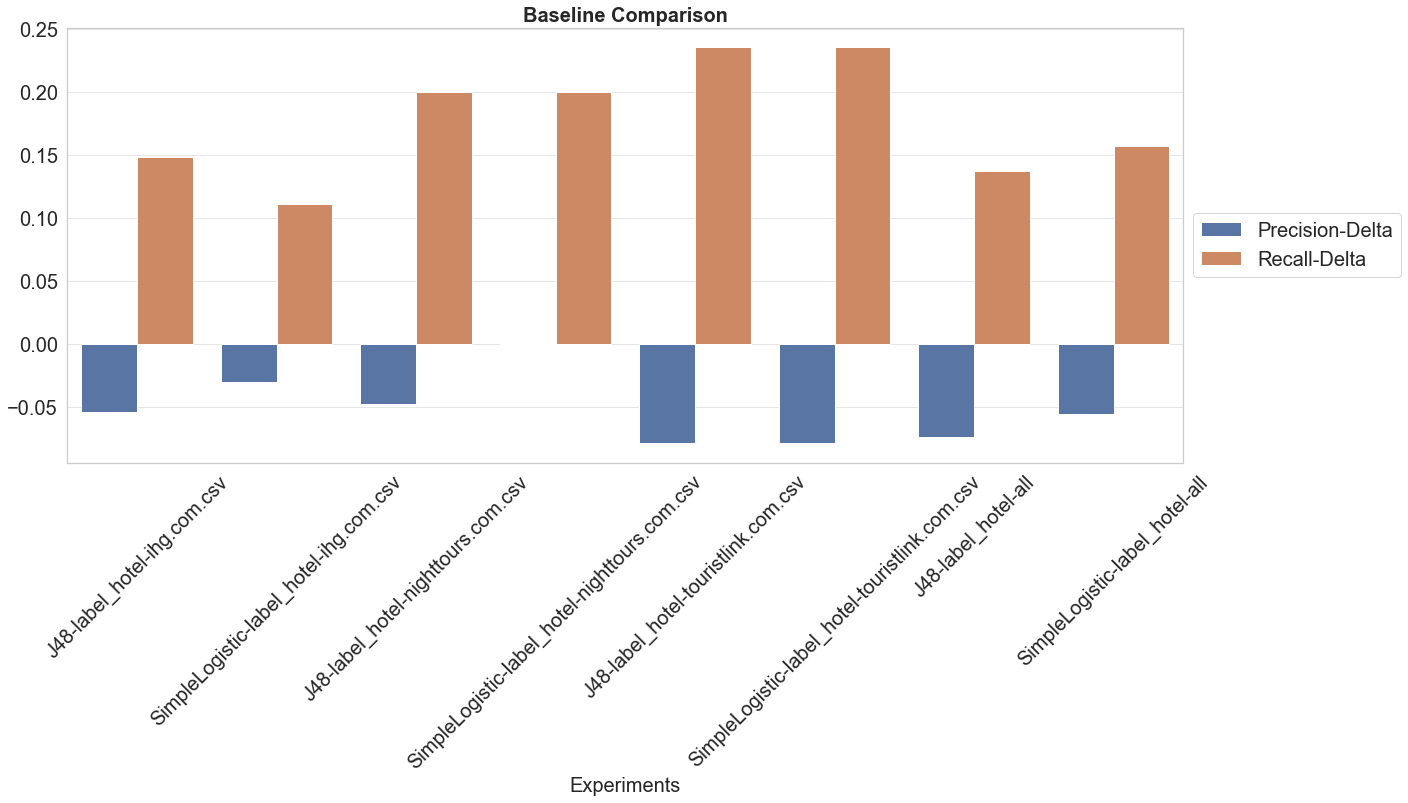

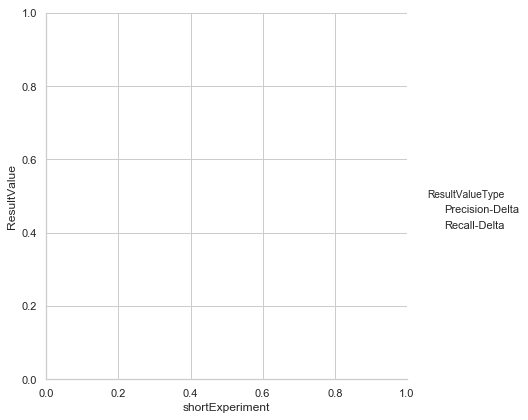

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotResults(df, title):
    sns.set(style="whitegrid")
    fig, ax1 = plt.subplots(figsize=(20,8))
    sns.catplot(x="shortExperiment", y="ResultValue", hue="ResultValueType", data=df, height=6, kind="bar", ax=ax1)
    
    titleAll = title
    ax1.set_title(titleAll, fontweight="bold", size=20) # Title
    ax1.set_xlabel("Experiments",fontsize = 20.0)
    ax1.set_ylabel("" ,fontsize = 20.0) # Y label
    ax1.tick_params(direction='out', length=6, width=2, labelsize=20, grid_alpha=0.5)
    ax1.tick_params(axis = 'x', labelrotation=45)
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)


dfAllExperimentsRearranged['shortExperiment'] = dfAllExperimentsRearranged['TrainedModel'].str.cat(dfAllExperimentsRearranged['Experiment'].str.replace('_author', '').str.replace('baseline_', '').str.replace('hotels_www.',''), sep='-')
plotResults(dfAllExperimentsRearranged, 'Baseline Comparison')

In [5]:
display(dfAllExperimentsRearranged.filter(items=['shortExperiment','Precision', 'Recall', 'F-1']).drop_duplicates(keep='first'))

,shortExperiment,Precision,Recall,F-1
0,J48-label_hotel-ihg.com.csv,0.642857,1.000000,0.782609
0,SimpleLogistic-label_hotel-ihg.com.csv,0.666667,0.962963,0.787879
0,J48-label_hotel-nighttours.com.csv,0.952381,1.000000,0.975610
0,SimpleLogistic-label_hotel-nighttours.com.csv,1.000000,1.000000,1.000000
0,J48-label_hotel-touristlink.com.csv,0.850000,1.000000,0.918919
0,SimpleLogistic-label_hotel-touristlink.com.csv,0.850000,1.000000,0.918919
0,J48-label_hotel-all,0.859649,0.960784,0.907407
0,SimpleLogistic-label_hotel-all,0.877193,0.980392,0.925926


In [6]:
round(dfAllExperimentsRearranged.filter(items=['shortExperiment', 'F-1-Delta']).drop_duplicates(keep='first')['F-1-Delta'].mean(),4)

0.0598